# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

![](https://i.imgur.com/OMSRrRS.png)

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database ([TMDb](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv)), including user ratings and revenue,this data set has 21 columns such as (budget,revenue,original_title,director) and 10866 Movies. 


### Question(s) for Analysis
*   <a href='#RQ1'> **What is happening to the movie industry and people's ratings through the years?**</a>
*    <a href='#RQ2&3'>**which genres are the most popular genres and which of them makes more profit?**</a>
*    <a href='#RQ4'>**What is the average run time of the films and which of them is more popular?**</a>
*    <a href='#RQ5'>**What  are the top 10 movies with the highest profit and budget?**</a>

#### Importing the used packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
pd.set_option("max_columns", 21)
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#db_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
Tmdb_df=pd.read_csv("DataSets/tmdb-movies.csv")
Tmdb_df.shape

(10866, 21)

In [3]:
Tmdb_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


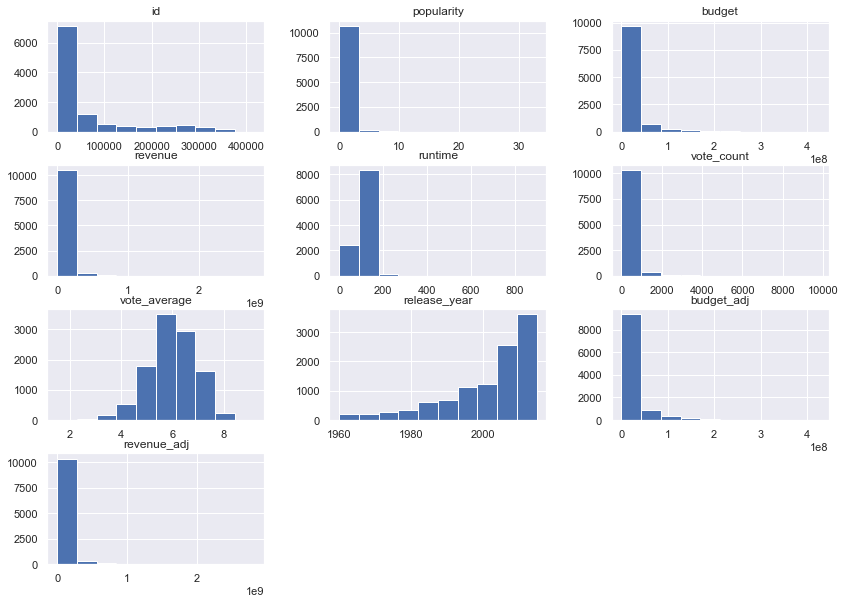

In [4]:
Tmdb_df.hist(figsize=(14,10));

In [5]:
Tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
Tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## First Impression :
*    **alot af messing values**.
*    **alot of columns we wont be using like(id,imdb_id,production_companies,tagline).**
*    **some data separated with a pipe ("|").**
*    **vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the                 average vote count.**
*    **some columns like budget and revenue has a zero value and must be removed.**
*    **some run time are more than 6 hours and must be droped**    



## Data Cleaning
### Steps:
*    **Dropping the unwanted columns.**
*    **Checking for messing values.**
*    **Replacing or droping the NaN values.**
*    **Checking for duplicates.**
*   **Removing duplicates.**
*   **Adding Profit column.**
*   **seprating the pipe("|") values to new columns.**
    

In [7]:
Tmdb_df.columns.tolist()

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [8]:
droped_col=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count','tagline']
Tmdb_df=Tmdb_df.drop(droped_col,True)
Tmdb_df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015


In [9]:
Tmdb_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
dtype: int64

In [10]:
Tmdb_df=Tmdb_df.dropna()

In [11]:
Tmdb_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
dtype: int64

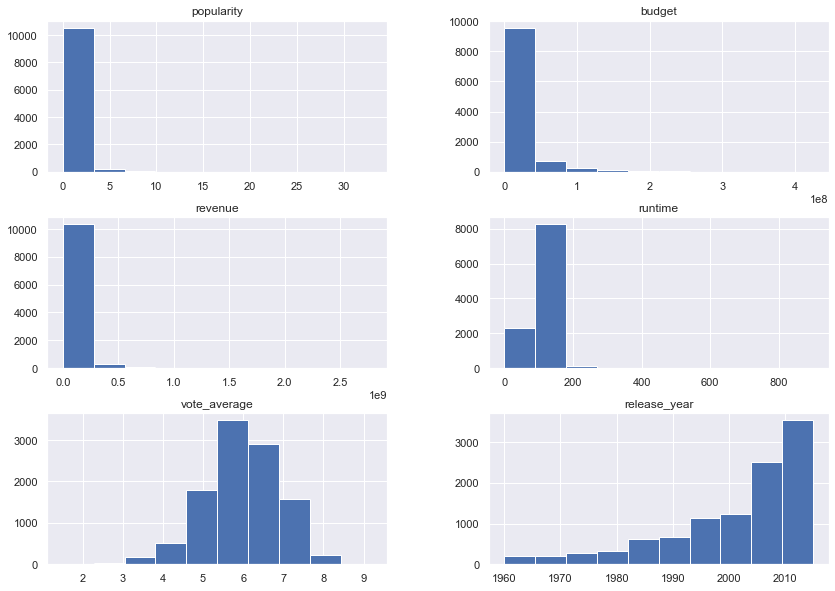

In [12]:
Tmdb_df.hist(figsize=(14,10));

In [13]:
profit=Tmdb_df["revenue"]-Tmdb_df['budget']
Tmdb_df.insert(loc=2,column="profit",value=profit)
Tmdb_df.head()

,popularity,budget,profit,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015


In [14]:
Tmdb_df.duplicated().sum()

1

In [15]:
Tmdb_df.drop_duplicates(inplace=True)
Tmdb_df.duplicated().sum()

0

In [16]:
Tmdb_df.shape

(10731, 12)

* **Removing** films that has a run time with zero.

In [17]:
drop_df=Tmdb_df.query('(runtime==0) |(runtime>400)|(runtime<10)')
Tmdb_df.drop(labels=drop_df.index,inplace=True)
Tmdb_df.reset_index(inplace=True)
Tmdb_df.drop(columns='index',inplace=True)
Tmdb_df.shape

(10613, 12)

* **Removing** the films with messing revenue and budget columns.

In [18]:
drop2_df=Tmdb_df.query('(budget==0) | (revenue==0)')
Tmdb_df.drop(labels=drop2_df.index,inplace=True)
Tmdb_df.reset_index(inplace=True)
Tmdb_df.drop(columns='index',inplace=True)
Tmdb_df.shape

(3849, 12)

<a id='RQ1'></a>
## Exploratory Data Analysis
## Research Question1: What is happening to the movie industry and people's ratings through the years?

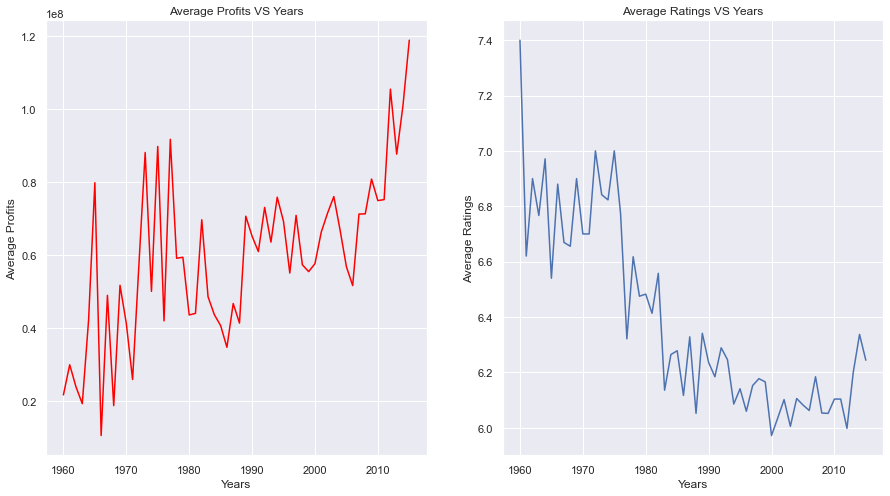

In [19]:
# We get the avg of profit and people ratings grouped by years of release
avg_profit_year=Tmdb_df.groupby('release_year')['profit'].mean()
avg_rating_year=Tmdb_df.groupby('release_year')['vote_average'].mean()
# Visulizing the data
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(avg_profit_year,color="red")
ax2.plot(avg_rating_year)

ax1.set_title('Average Profits VS Years')
ax1.set_xlabel('Years')
ax1.set_ylabel('Average Profits')

ax2.set_title('Average Ratings VS Years')
ax2.set_xlabel('Years')
ax2.set_ylabel('Average Ratings')
plt.show()

## Conclusion
From the **(Average Profits VS Years)** figure we saw that the profit is increasing which means the film industry is making more money as time goes by, But people are becoming more selective in their ratings **(which is decreased as time goes by)** and the artistic sense became more distinguished.

<a id='RQ2&3'></a>
## Research Questions 2&3:which genres are the most popular genres and which of them makes more profit?

In [20]:
def remove_pipe(col):
    """
    this function removes the pipe ('|')  symbol from the data. 
    Input : coulmn name that is already excist in the data set.
    Return: Series with the each value counts.
    """
    NewData = pd.Series(Tmdb_df[col].str.cat(sep = '|').split('|'))
    DataCount = NewData.value_counts(ascending=False)
    return DataCount

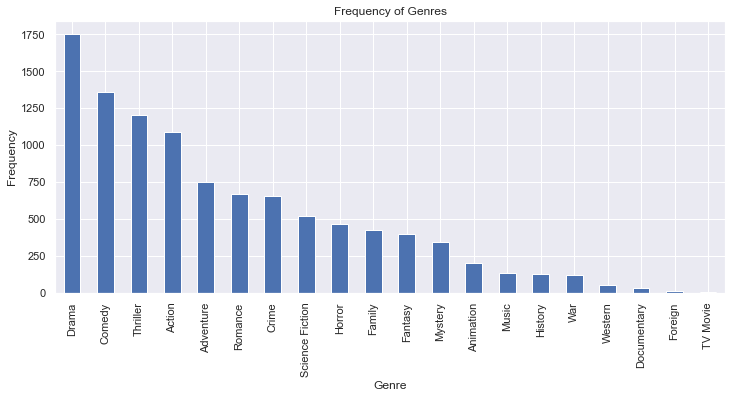

In [21]:
geners_count=remove_pipe('genres');
geners_count.plot(kind='bar',figsize=(12,5),title="Frequency of Genres");
plt.ylabel('Frequency');
plt.xlabel('Genre');
#we will use it later
dict_1=geners_count.to_dict()

In [22]:
gener_split = (Tmdb_df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
Tmdb_df=Tmdb_df.join(gener_split)
Tmdb_df.head(1)

,popularity,budget,profit,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,Action,Adventure,Science Fiction,Thriller,None


In [23]:
Tmdb_df.drop(columns=['genres'],inplace=True)
Tmdb_df.head(1)

,popularity,budget,profit,revenue,original_title,cast,director,runtime,release_date,vote_average,release_year,genres_1,genres_2,genres_3,genres_4,genres_5
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/15,6.5,2015,Action,Adventure,Science Fiction,Thriller,None


**Creating** a function to apply filters on the data set.

In [24]:
def gener_filt(genre):
    """
    Takes one genre and returns the main data frame with the data of that genre only makes a filter from it
    and then applaying the filter to the main data frame.
    INPUT: A gener found in this list ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror', 'Adventure', 'Crime', 
        'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation', 'Documentary', 'Music', 'History', 'War', 'Foreign', 
        'Western', 'TV Movie']
     return: a data frame with the wanted data.   
    """
    filt=(Tmdb_df.genres_1 == genre) | (Tmdb_df['genres_2']==genre) | (Tmdb_df['genres_3']==genre)|(Tmdb_df['genres_4']==genre)|(Tmdb_df['genres_5']==genre)
    return Tmdb_df[filt]

In [25]:
def getGener_mean(gen,col):
    """
    Takes a genre and gets the mean of a specific column (col).
    INPUT: 
        gen: genrewanted to apply the gener_filt function on.
        col: column from the main data frame which we want to get it is mean.
    Returns:
        mean(float): The mean value of the wanted column from the wanted gender.
    """
    mean=gener_filt(gen)[col].mean()
    return mean

Creating a dictionary to save the value of the average profit of each genre and then visualizing them using matplotlib.

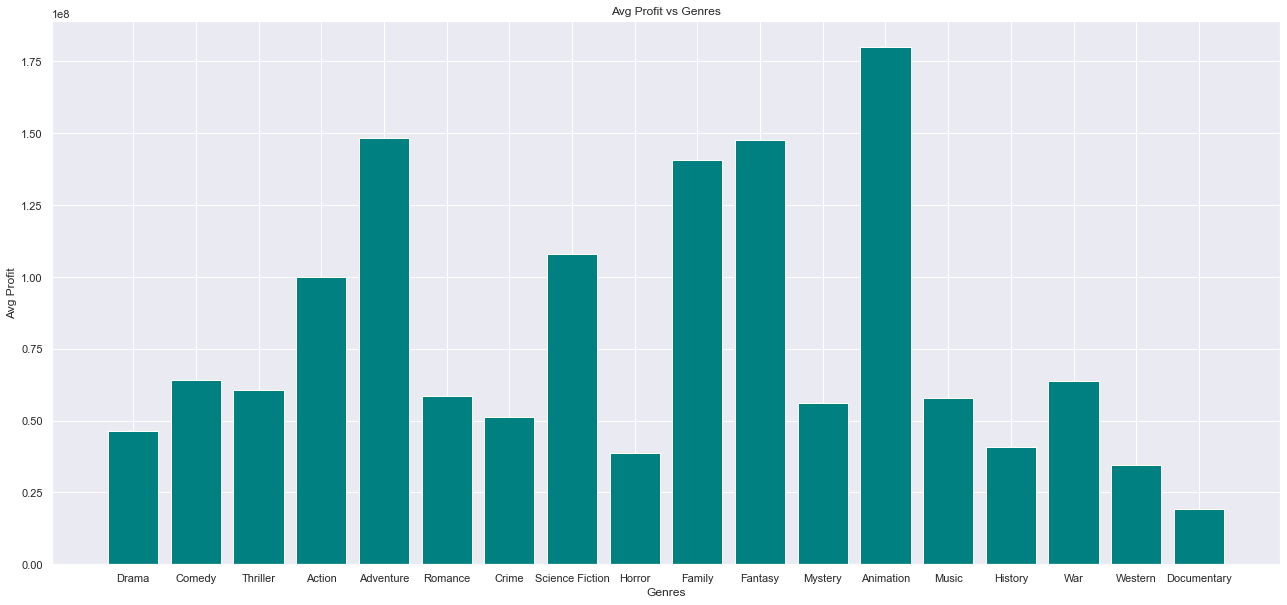

In [26]:
dict_2={}
for gen in dict_1.keys():
    dict_2[gen]=getGener_mean(gen,'profit')
dict_2.pop('Foreign')
dict_2.pop('TV Movie')
fig = plt.figure(figsize=(22,10))
plt.bar(dict_2.keys(),dict_2.values(),align='center',color='teal');
plt.ylabel('Avg Profit');
plt.xlabel('Genres');
plt.title('Avg Profit vs Genres');

Creating a dictionary to save the value of the average rating of each genre and then visualizing them using matplotlib.

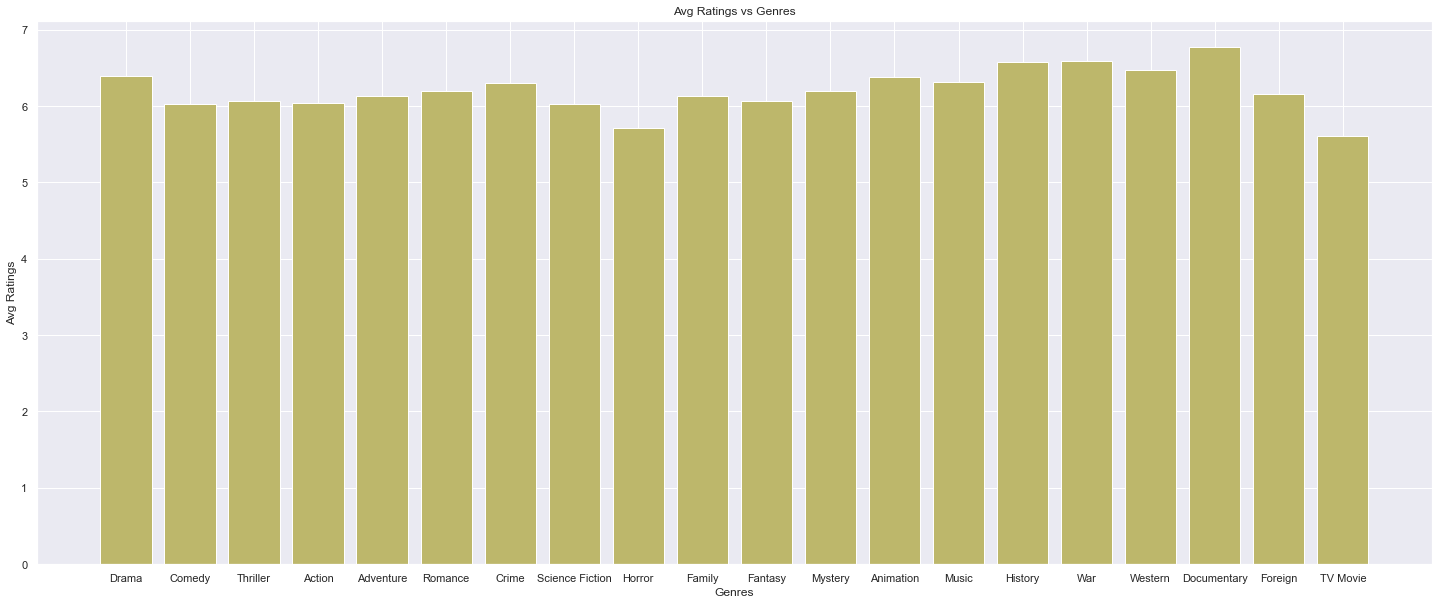

In [27]:
dict_3={}
for gen in dict_1.keys():
    dict_2[gen]=getGener_mean(gen,'vote_average')
fig = plt.figure(figsize=(25,10))
plt.bar(dict_2.keys(),dict_2.values(),color='darkkhaki');
plt.ylabel('Avg Ratings');
plt.xlabel('Genres');
plt.title('Avg Ratings vs Genres');

### Conclusion:
**Animation** and **Adventure** films often have the most profit but the heights average ratings gofor Documentary films, the most popular genre is drama over 4000 films.

<a id='RQ4'></a>
## Research Question4:What is the average run time of the films and which of them is more popular?

In [29]:
Tmdb_df.runtime.describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Visulizing the run time data.

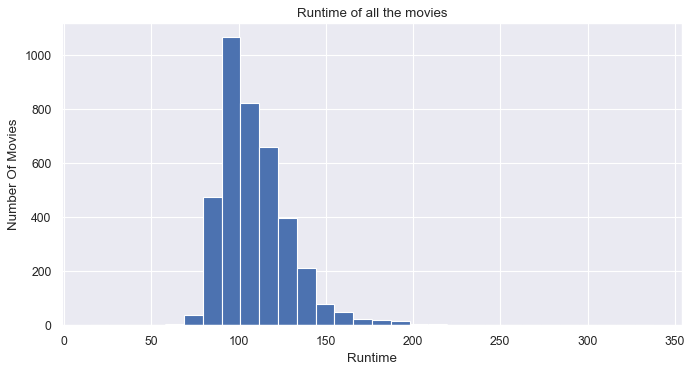

In [28]:
plt.figure(figsize=(10,5), dpi = 80)
plt.xlabel('Runtime')
plt.ylabel('Number Of Movies')
plt.title('Runtime of all the movies')

# plot relationship between runtime and number of movies
plt.hist(Tmdb_df['runtime'], bins =30);

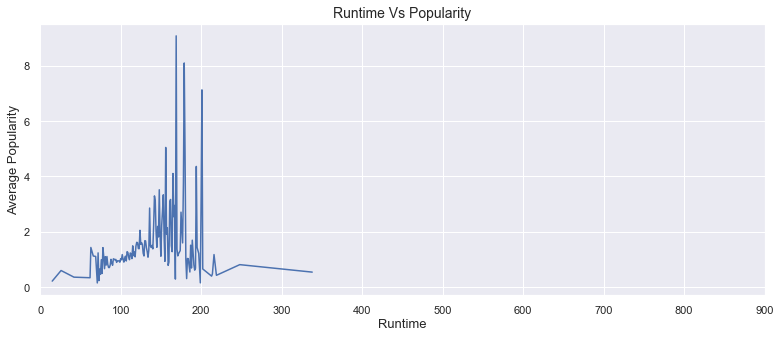

In [30]:
Tmdb_df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))
#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
#setup the figure size.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

### Conclusion:
*  **The average** runtime is 102 min:
*  **25%** of movies have runtime less than 90 min
*  **50%** of movies have runtime less than 100 min
*  **75%** of movies have runtime less than 112 min
*  **max, min** runtime is 400 min ,10 min

<a id='RQ5'></a>
## Research Question5:What  are the top 10 movies with the highest profit and budget?

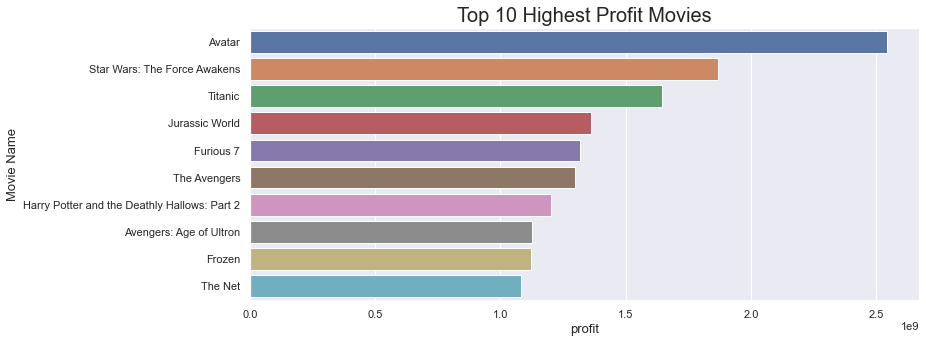

In [38]:
#top 10 films which made highest Profit.
info = pd.DataFrame(Tmdb_df['profit'].sort_values(ascending = False))
info['original_title'] = Tmdb_df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['profit'][:10])
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 Highest Profit Movies",fontsize = 20)
ax.set_xlabel("profit",fontsize = 13)
ax.set_ylabel("Movie Name",fontsize = 13)
sns.set_style("darkgrid")

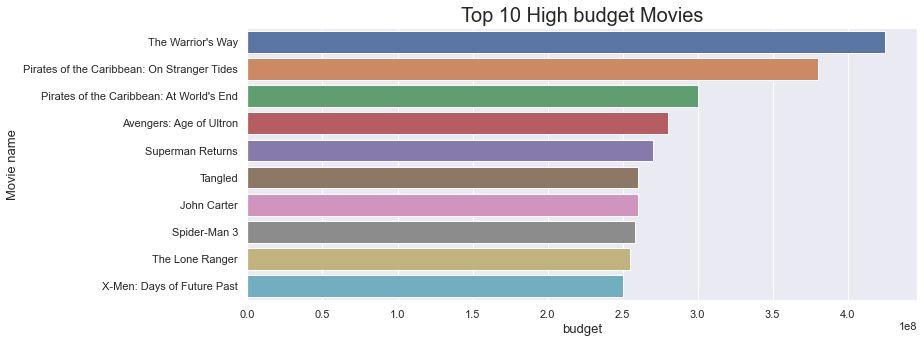

In [39]:
#top 10 films which made highest budget.
info = pd.DataFrame(Tmdb_df['budget'].sort_values(ascending = False))
info['original_title'] = Tmdb_df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])

#make the point plot and setup the title and labels.
ax= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 High budget Movies",fontsize = 20)
ax.set_xlabel("budget",fontsize = 13)
ax.set_ylabel("Movie name",fontsize = 13)
sns.set_style("darkgrid")

### Conclusion
* **Spending more money on the film budget doesn't mean that the movie will achieve a high profit.**

<a id='conclusions'></a>
## Conclusions

* **From the average films ratings people are becoming more selective in the movies they watch.**
* **The film industry is making more over time.**
* **The most frequent genre is Drama.**
* **Animation films make the most profit.**
* **The average runtime is 102 min.**
* **Movies with a run time between (100:200)min has the highest popularity.**
* **Spending more money on the film budget doesn't mean that the movie will achieve a high profit.**

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Udacity_TMDb_Movies _Project.ipynb'])

1